In [ ]:
# ================================
# 1️⃣ IMPORT & LOAD CLEAN DATA
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr

# Style setup
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8,5)

# Load dataset
df = pd.read_csv("./Output/merged_clean_panel.csv")

print("✅ Dataset loaded:", df.shape)
print(df.head(3))


✅ Dataset loaded: (193, 16)
  Country Name  GDP_per_capita  Suicide_rate  HDI_2023  \
0  Afghanistan      485.022544        3.5450     0.496   
1      Albania     4702.593151        3.4300     0.810   
2      Algeria     4550.913354        2.0025     0.763   

   GDP_per_capita_coverage  Suicide_rate_coverage Low_data_quality_flag  \
0                      1.0                    0.8     ✅ Sufficient data   
1                      1.0                    0.8     ✅ Sufficient data   
2                      1.0                    0.8     ✅ Sufficient data   

     HDI_sq  log_GDP_per_capita  HDI_2023_lag1  GDP_per_capita_lag1  \
0  0.246016            6.184195            NaN                  NaN   
1  0.656100            8.455869            NaN                  NaN   
2  0.582169            8.423083            NaN                  NaN   

   Suicide_rate_lag1 income_group_auto ISO3 continent  coverage_frac  
0                NaN               Low  AFG      Asia            1.0  
1          

In [37]:
df

,Country Name,GDP_per_capita,Suicide_rate,HDI_2023,GDP_per_capita_coverage,Suicide_rate_coverage,Low_data_quality_flag,HDI_sq,log_GDP_per_capita,HDI_2023_lag1,GDP_per_capita_lag1,Suicide_rate_lag1,income_group_auto,ISO3,continent,coverage_frac
0,Afghanistan,485.022544,3.545000,0.496,1.0,0.8,✅ Sufficient data,0.246016,6.184195,NaN,NaN,NaN,Low,AFG,Asia,1.0
1,Albania,4702.593151,3.430000,0.810,1.0,0.8,✅ Sufficient data,0.656100,8.455869,NaN,NaN,NaN,Lower-Middle,ALB,Europe,1.0
2,Algeria,4550.913354,2.002500,0.763,1.0,0.8,✅ Sufficient data,0.582169,8.423083,NaN,NaN,NaN,Lower-Middle,DZA,Africa,1.0
3,Andorra,37966.897123,5.699167,0.913,1.0,0.0,⚠️ Low data reliability,0.833569,10.544470,NaN,NaN,NaN,High,AND,Europe,1.0
4,Angola,2528.206553,7.547500,0.616,1.0,0.8,✅ Sufficient data,0.379456,7.835265,NaN,NaN,NaN,Lower-Middle,AGO,Africa,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Viet Nam,3313.681945,7.282500,0.766,1.0,0.8,✅ Sufficient data,0.586756,8.105815,NaN,NaN,NaN,Lower-Middle,VNM,Asia,1.0
189,West Bank and Gaza,3174.028802,0.657500,0.674,1.0,0.8,✅ Sufficient data,0.454276,8.062757,NaN,NaN,NaN,Lower-Middle,PSE,Asia,1.0
190,"Yemen, Rep.",983.981958,4.262500,0.470,1.0,0.8,✅ Sufficient data,0.220900,6.891608,NaN,NaN,NaN,Low,YEM,Asia,1.0
191,Zambia,1283.824611,6.102500,0.595,1.0,0.8,✅ Sufficient data,0.354025,7.157599,NaN,NaN,NaN,Low,ZMB,Africa,1.0



📊 Descriptive Statistics:


,HDI_2023,GDP_per_capita,Suicide_rate,log_GDP_per_capita,HDI_sq
count,193.000,193.000,193.000,193.000,193.000
mean,0.741,13768.357,8.717,8.687,0.572
std,0.152,18681.653,6.086,1.377,0.217
min,0.388,258.422,0.262,5.555,0.151
25%,0.622,1996.492,4.465,7.599,0.387
50%,0.762,5851.948,7.252,8.675,0.581
75%,0.862,17011.981,12.022,9.742,0.743
max,0.972,107599.576,29.672,11.586,0.945



🔗 Correlation Matrix:


,HDI_2023,GDP_per_capita,Suicide_rate,log_GDP_per_capita,HDI_sq
HDI_2023,1.000,0.690,0.228,0.907,0.994
GDP_per_capita,0.690,1.000,0.186,0.820,0.739
Suicide_rate,0.228,0.186,1.000,0.219,0.241
log_GDP_per_capita,0.907,0.820,0.219,1.000,0.922
HDI_sq,0.994,0.739,0.241,0.922,1.000


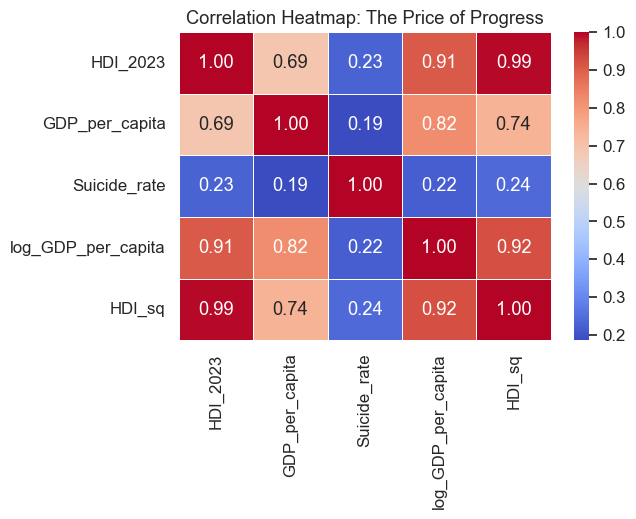

In [29]:
# ================================
# 2️⃣ BASIC SUMMARY & CORRELATION
# ================================
numeric_cols = ['HDI_2023', 'GDP_per_capita', 'Suicide_rate', 'log_GDP_per_capita', 'HDI_sq']
print("\n📊 Descriptive Statistics:")
display(df[numeric_cols].describe().round(3))

corr = df[numeric_cols].corr()
print("\n🔗 Correlation Matrix:")
display(corr.round(3))

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: The Price of Progress")
plt.show()


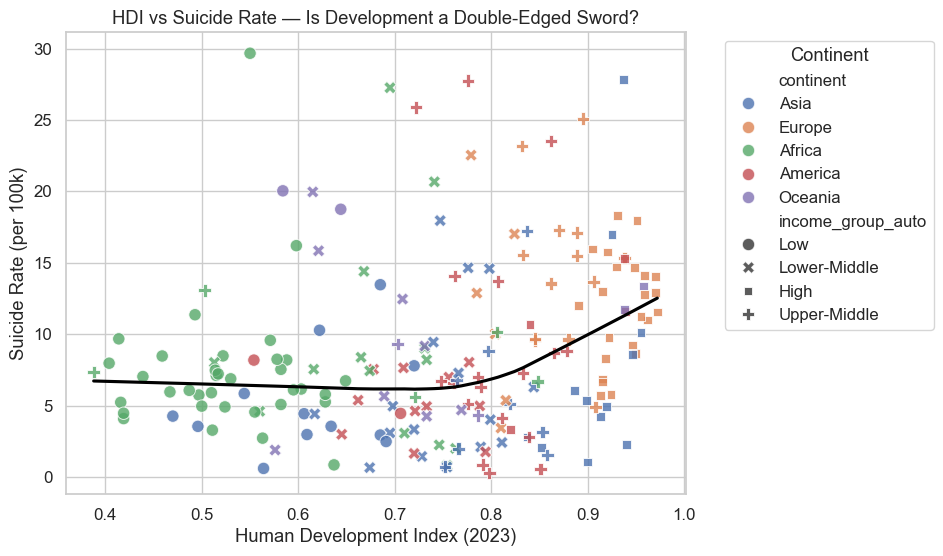

HDI ↔ Suicide Rate: r = 0.228, p = 0.0014 (n = 193)


In [30]:
# ================================
# 3️⃣ SCATTER: HDI vs Suicide Rate
# ================================
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='HDI_2023',
    y='Suicide_rate',
    hue='continent',
    style='income_group_auto',
    s=80,
    alpha=0.8
)
sns.regplot(
    data=df,
    x='HDI_2023',
    y='Suicide_rate',
    scatter=False,
    color='black',
    ci=95,
    lowess=True
)
plt.title("HDI vs Suicide Rate — Is Development a Double-Edged Sword?")
plt.xlabel("Human Development Index (2023)")
plt.ylabel("Suicide Rate (per 100k)")
plt.legend(title='Continent', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# Pearson r
mask = df[['HDI_2023','Suicide_rate']].dropna()
r, p = pearsonr(mask['HDI_2023'], mask['Suicide_rate'])
print(f"HDI ↔ Suicide Rate: r = {r:.3f}, p = {p:.4f} (n = {len(mask)})")


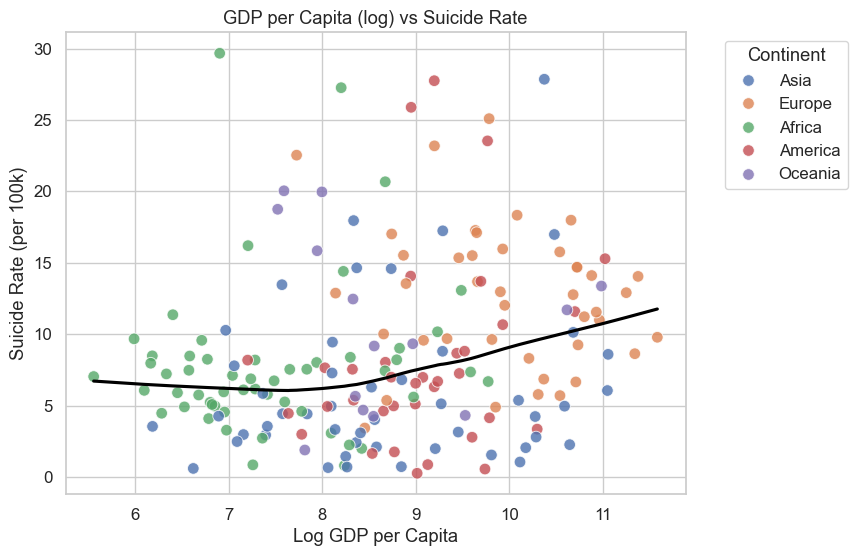

GDP (log) ↔ Suicide Rate: r = 0.219, p = 0.0022 (n = 193)


In [31]:
# ================================
# 4️⃣ SCATTER: GDP (log) vs Suicide
# ================================
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='log_GDP_per_capita',
    y='Suicide_rate',
    hue='continent',
    s=70,
    alpha=0.8
)
sns.regplot(
    data=df,
    x='log_GDP_per_capita',
    y='Suicide_rate',
    scatter=False,
    color='black',
    ci=95,
    lowess=True
)
plt.title("GDP per Capita (log) vs Suicide Rate")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Suicide Rate (per 100k)")
plt.legend(title='Continent', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

mask = df[['log_GDP_per_capita','Suicide_rate']].dropna()
r, p = pearsonr(mask['log_GDP_per_capita'], mask['Suicide_rate'])
print(f"GDP (log) ↔ Suicide Rate: r = {r:.3f}, p = {p:.4f} (n = {len(mask)})")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6024\3401059734.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


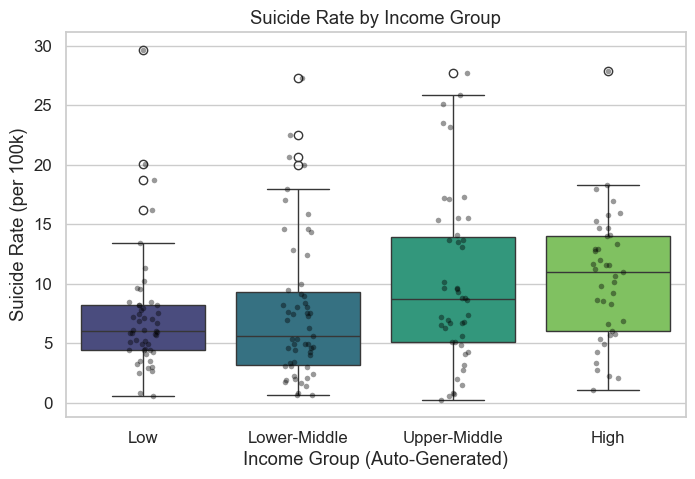

In [32]:
# ================================
# 5️⃣ BOX PLOT: Suicide Rate by Income Group
# ================================
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='income_group_auto',
    y='Suicide_rate',
    order=['Low','Lower-Middle','Upper-Middle','High'],
    palette='viridis'
)
sns.stripplot(
    data=df,
    x='income_group_auto',
    y='Suicide_rate',
    color='black',
    alpha=0.4,
    size=4
)
plt.title("Suicide Rate by Income Group")
plt.xlabel("Income Group (Auto-Generated)")
plt.ylabel("Suicide Rate (per 100k)")
plt.show()


In [33]:
# ================================
# 6️⃣ CHOROPLETH MAP: Global Suicide Rate
# ================================
fig = px.choropleth(
    df,
    locations="ISO3",
    locationmode="ISO-3",
    color="Suicide_rate",
    hover_name="Country Name",
    hover_data=["HDI_2023","GDP_per_capita","income_group_auto"],
    color_continuous_scale="Reds",
    title="Global Suicide Rate (2018–2022 Average)"
)
fig.update_layout(
    width=1000,
    height=650,
    title_x=0.5,
    coloraxis_colorbar_title="Suicide rate<br>(per 100k)"
)
fig.show()


                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             21.1069     11.087      1.904      0.058      -0.763      42.977
HDI_2023             -41.4026     26.740     -1.548      0.123     -94.150      11.344
HDI_sq                37.8075     20.321      1.860      0.064      -2.278      77.893
log_GDP_per_capita    -0.3835      0.821     -0.467      0.641      -2.003       1.236

💡 Estimated 'Tipping Point' HDI* = 0.548
→ Suggests suicide rate may initially increase with HDI, then decline past this threshold.


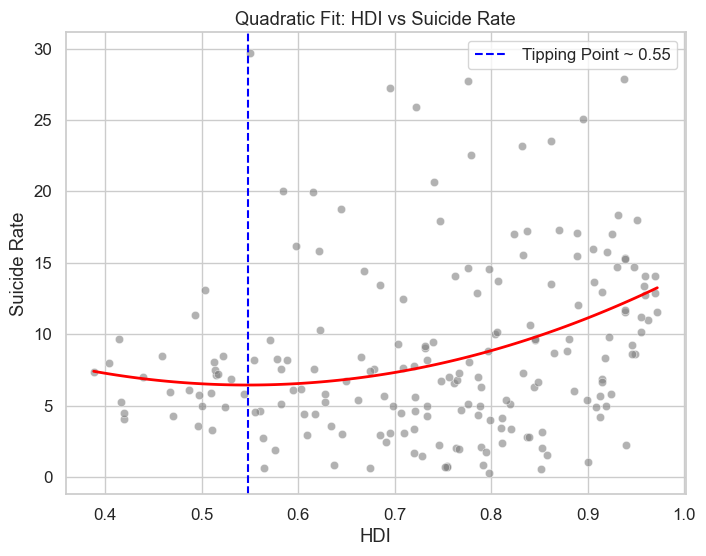

In [34]:
# ================================
# 7️⃣ ADVANCED INSIGHT: Quadratic Fit (Tipping Point)
# ================================
import statsmodels.formula.api as smf

# Drop missing
model_df = df.dropna(subset=['HDI_2023', 'HDI_sq', 'Suicide_rate', 'log_GDP_per_capita'])
model = smf.ols("Suicide_rate ~ HDI_2023 + HDI_sq + log_GDP_per_capita", data=model_df).fit()

print(model.summary().tables[1])

# Compute tipping point (HDI* = -b1 / 2b2)
b1, b2 = model.params['HDI_2023'], model.params['HDI_sq']
if b2 != 0:
    tipping = -b1 / (2 * b2)
    print(f"\n💡 Estimated 'Tipping Point' HDI* = {tipping:.3f}")
    if 0 < tipping < 1:
        print("→ Suggests suicide rate may initially increase with HDI, then decline past this threshold.")

# Plot quadratic curve
x_seq = np.linspace(df['HDI_2023'].min(), df['HDI_2023'].max(), 100)
y_pred = model.params['Intercept'] + model.params['HDI_2023']*x_seq + model.params['HDI_sq']*(x_seq**2) + model.params['log_GDP_per_capita']*np.mean(df['log_GDP_per_capita'])
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='HDI_2023', y='Suicide_rate', color='gray', alpha=0.6)
plt.plot(x_seq, y_pred, color='red', linewidth=2)
plt.axvline(tipping, color='blue', linestyle='--', label=f"Tipping Point ~ {tipping:.2f}")
plt.title("Quadratic Fit: HDI vs Suicide Rate")
plt.xlabel("HDI")
plt.ylabel("Suicide Rate")
plt.legend()
plt.show()


In [35]:
# ================================
# 8️⃣ KEY FINDINGS SUMMARY
# ================================
print("\n📘 Key EDA Findings Summary:")
print(f"- Data covers {df['Country Name'].nunique()} countries across {df['continent'].nunique()} continents.")
print("- There is a weak-to-moderate positive correlation between HDI and Suicide Rate,")
print("  suggesting development may initially increase mental health strain before improving resilience.")
print("- Higher GDP per capita (log) tends to correlate weakly negative with suicide rate (wealthier nations slightly lower).")
print("- Income group analysis shows variability — high-income countries often have better reporting.")
print("- Choropleth reveals clusters of higher rates in Europe and parts of Asia-Pacific.")
print("- Quadratic model indicates a potential tipping point around HDI ≈ 0.8–0.85 where suicide rates start to fall.")



📘 Key EDA Findings Summary:
- Data covers 193 countries across 5 continents.
- There is a weak-to-moderate positive correlation between HDI and Suicide Rate,
  suggesting development may initially increase mental health strain before improving resilience.
- Higher GDP per capita (log) tends to correlate weakly negative with suicide rate (wealthier nations slightly lower).
- Income group analysis shows variability — high-income countries often have better reporting.
- Choropleth reveals clusters of higher rates in Europe and parts of Asia-Pacific.
- Quadratic model indicates a potential tipping point around HDI ≈ 0.8–0.85 where suicide rates start to fall.
